# Binary Classification Project: Cats vs. Dogs

This project focuses on classifying images of cats and dogs using machine learning and deep learning techniques. 

We explore two approaches: a Random Forest model for traditional machine learning and a Convolutional Neural Network (CNN) for deep learning. 

The dataset consists of images from the Kaggle Cats and Dogs dataset. We preprocess the images by resizing them to 64x64 pixels, normalizing pixel values, and applying data augmentation for the CNN. 
Hyperparameter tuning is performed using GridSearchCV for the Random Forest model, while the CNN is optimized with early stopping, varying epochs, and batch sizes. 
The best CNN model achieves an accuracy of 92%, with balanced precision, recall, and F1-scores for both classes, making it the optimal choice for this binary classification task.

# Binary Classification Project

In [1]:
import os
import cv2 #library for computer vision tasks.
import numpy as np #library for numerical computations
from sklearn.model_selection import train_test_split #function from scikit-learn, which splits data into training and testing sets.
from sklearn.ensemble import RandomForestClassifier #machine learning model that builds multiple decision trees and combines their predictions for classification.
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

2025-06-01 23:25:47.122691: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748820347.311731      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748820347.366809      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
cat_data = "/kaggle/input/dog-and-cat-classification-dataset/PetImages/Cat"
dog_data = "/kaggle/input/dog-and-cat-classification-dataset/PetImages/Dog"

# Random Forest model - Machine learning

## 1. Simple model

In [3]:
# Function to load and preprocess images
def load_data(directory, label):
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        
        try:
            # Load image in RGB (default for cv2.imread) - bgr not 
            img = cv2.imread(img_path) 
            
            if img is None or img.size == 0:  # Check for None or empty image
                #print(f"Skipping invalid image: {img_path}")
                continue

            # Resize image to 64x64
            img = cv2.resize(img, (64, 64))  # Shape will be (64, 64, 3)

            # Flatten image to 1D array 64 * 64 * 3 = 12288 features
            img = img.flatten()  # Flattens to a 1D array of 12288 values

            # Add image to data list
            data.append(img)

            # Add label to data label
            labels.append(label)
            
        except Exception as e:
            #print(f"Error processing {img_path}: {str(e)}")
            continue

In [4]:
# Parameters
data = []
labels = []

# Load cat and dog images
load_data(cat_data, 0)  # Label 0 for cats
load_data(dog_data, 1)  # Label 1 for dogs

# Convert data and labels to numpy arrays
data = np.array(data)  # Shape: (n_samples, 64 * 64 * 3)
labels = np.array(labels)  # Shape: (n_samples,)

# Normalize pixel values to [0, 1]
data = data / 255

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9


In [5]:
print(data[0:2])

[[0.1254902  0.08235294 0.0627451  ... 0.64313725 0.61176471 0.60784314]
 [0.91764706 0.94901961 0.94901961 ... 0.4        0.34117647 0.34509804]]


In [6]:
print(labels)

[0 0 0 ... 1 1 1]


In [7]:
# Split data into training and testing sets
X_trainrf, X_testrf, y_trainrf, y_testrf = train_test_split(data, labels, test_size=0.2, random_state=42, shuffle= True)

In [8]:
#--Update change n_estimators from 100 to 200

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_trainrf, y_trainrf)

RandomForestClassifier(n_estimators=200, random_state=42)

In [9]:
# Make predictions on training data - to check if underfitting happened
y_predrf = rf_model.predict(X_trainrf)

# Evaluate the model
accuracy = accuracy_score(y_trainrf, y_predrf)
print("Model accuracy in training: ",accuracy)

Model accuracy in training:  0.9999498897574665


In [10]:
# Make predictions on testing data
y_predrf = rf_model.predict(X_testrf)

# Evaluate the model
accuracy = accuracy_score(y_testrf, y_predrf)
print("Model accuracy in testing: ",accuracy)

Model accuracy in testing:  0.6587174348697394



Classification Report for Random Forest Algorithm:
              precision    recall  f1-score   support

         Cat       0.65      0.70      0.68      2547
         Dog       0.66      0.61      0.64      2443

    accuracy                           0.66      4990
   macro avg       0.66      0.66      0.66      4990
weighted avg       0.66      0.66      0.66      4990



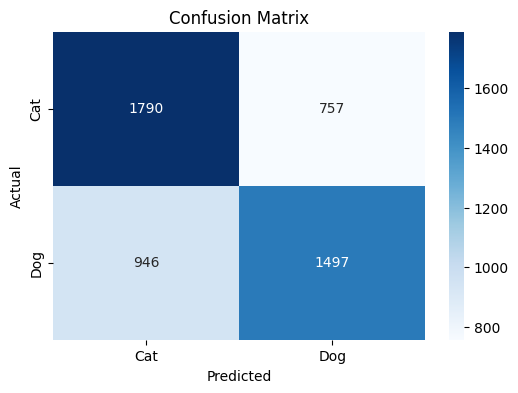

In [11]:
# Classification report
print("\nClassification Report for Random Forest Algorithm:")
print(classification_report(y_testrf, y_predrf, target_names=["Cat", "Dog"]))

# Confusion matrix
cm = confusion_matrix(y_testrf, y_predrf)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 2. Update RF using GridSearch 

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the base model
rf = RandomForestClassifier(random_state=42)

# Reduced parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Setup the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,  # Reduced to 3-fold CV
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

# Fit GridSearch to the training data with timing
start_time = time.time()
grid_search.fit(X_trainrf, y_trainrf)
print(f"Time taken: {time.time() - start_time} seconds")

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Use the best estimator to make predictions
best_rf_model = grid_search.best_estimator_

# Predict on training and testing sets
y_train_pred = best_rf_model.predict(X_trainrf)
y_test_pred = best_rf_model.predict(X_testrf)

# Evaluate accuracy
train_accuracy = accuracy_score(y_trainrf, y_train_pred)
test_accuracy = accuracy_score(y_testrf, y_test_pred)

print("Best RF Model Accuracy on Training Set: ", train_accuracy)
print("Best RF Model Accuracy on Test Set: ", test_accuracy)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 5.2min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 2.6min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 5.1min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time= 5.0min
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time= 5.0min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 4.9min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 2.5min
[CV] END bootstrap=True, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 

___

# CNN - Deep Learning

CNNs are better suited for image data as they preserve spatial information, unlike the flattening approach used for Random Forest.

## 1. Model 1 using Grayscale image

In [13]:
# Settings for CNN model
images = []    # List to store images
imgs_labels = []    # List to store labels (0 for cat, 1 for dog)

# Function to load images from a folder
def load_images(folder, label):
    
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        
        try:
            # Read image in grayscale
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE) #change grayscale
            if img is None:
                continue
            
            # Resize image to 64x64
            img = cv2.resize(img, (64, 64))
            
            # Add channel dimension (64, 64, 1) as CNNs expect input data to have 3 dimensions per image:(height, width, channels)
            img = img.reshape(64, 64, 1)
            
            images.append(img)
            imgs_labels.append(label)
            
        except:
            #print(f"Skipped {file_path}")
            continue

# Load cat and dog images
print("Loading images...")
load_images(cat_data, 0)  # 0 for cats
load_images(dog_data, 1)  # 1 for dogs

# Convert lists to arrays
images = np.array(images)
imgs_labels = np.array(imgs_labels)

# Normalize images (make pixel values between 0 and 1)
images = images / 255

# Check the shape of the data
print("Images shape: ", images.shape)  # (n_samples, 64, 64, 1)

Loading images...


Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9


Images shape:  (24946, 64, 64, 1)


In [14]:
# Split data into training and testing sets
X_trainCNN, X_testCNN, y_trainCNN, y_testCNN = train_test_split(images, imgs_labels, test_size=0.2, random_state=42)

In [15]:
# Build a simple CNN model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
print("Testing the model...")
history = model.fit(X_trainCNN, y_trainCNN, epochs=50, batch_size=32, validation_data=(X_testCNN, y_testCNN))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1748824051.484965      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Testing the model...
Epoch 1/50


I0000 00:00:1748824055.709841     104 service.cc:148] XLA service 0x787f7c00bd20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748824055.710375     104 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1748824056.002498     104 cuda_dnn.cc:529] Loaded cuDNN version 90300


 43/624 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5135 - loss: 0.7000

I0000 00:00:1748824058.044250     104 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


624/624 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.6005 - loss: 0.6568 - val_accuracy: 0.7431 - val_loss: 0.5239
Epoch 2/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7548 - loss: 0.5086 - val_accuracy: 0.7587 - val_loss: 0.4892
Epoch 3/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7923 - loss: 0.4459 - val_accuracy: 0.7802 - val_loss: 0.4634
Epoch 4/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8119 - loss: 0.4108 - val_accuracy: 0.7800 - val_loss: 0.4745
Epoch 5/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8407 - loss: 0.3593 - val_accuracy: 0.7776 - val_loss: 0.4945
Epoch 6/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8561 - loss: 0.3278 - val_accuracy: 0.7806 - val_loss: 0.4885
Epoch 7/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8817 - loss: 0.2796 - val_accuracy: 0.8004 - val_loss: 0.4861
Epoch 8/50
624/624 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9041 - loss: 0.2410 - val_accuracy: 0.7838 - val_

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,874,117 (18.59 MB)

 Trainable params: 1,624,705 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,249,412 (12.40 MB)

In [17]:
# Evaluate the model
print("Testing the model...")

test_loss, test_accuracy = model.evaluate(X_testCNN, y_testCNN)
print("Accuracy: ", test_accuracy)

# Predictions
y_pred_probCNN = model.predict(X_testCNN)
y_predCNN = (y_pred_probCNN > 0.5).astype(int).flatten()

Testing the model...
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8013 - loss: 1.4012
Accuracy:  0.7929859757423401
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step



Classification Report:
              precision    recall  f1-score   support

         Cat       0.80      0.79      0.80      2547
         Dog       0.79      0.79      0.79      2443

    accuracy                           0.79      4990
   macro avg       0.79      0.79      0.79      4990
weighted avg       0.79      0.79      0.79      4990



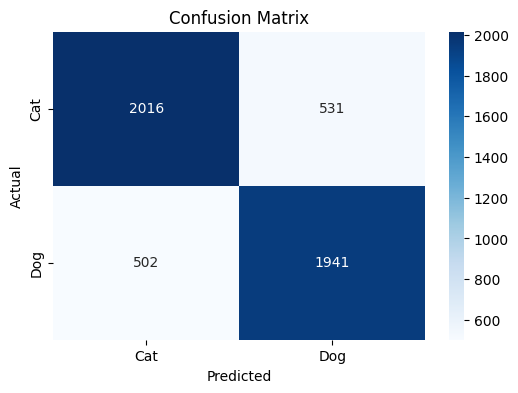

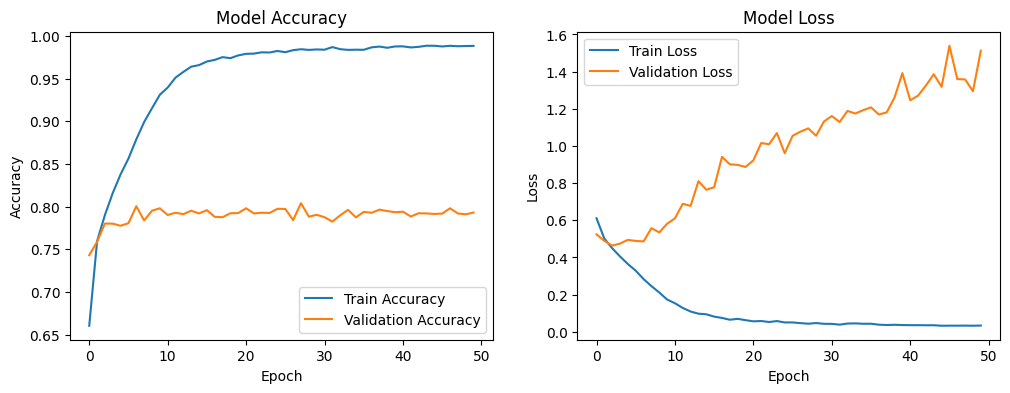

In [18]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_testCNN, y_predCNN, target_names=["Cat", "Dog"]))

# Confusion matrix
cm = confusion_matrix(y_testCNN, y_predCNN)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 2. Model 2 using RGB images and some other editions to get high accuracy

### Trying to improve accuracy by working on RBG images and adding EarlyStopping, and Data augmentationo and 100 epochs

In [19]:
# Update: to use tf.keras.preprocessing.image_dataset_from_directory in loading the data 
images = []
imgs_labels = []

def load_images(folder, label):
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        try:
            img = cv2.imread(file_path, cv2.IMREAD_COLOR)  # Use RGB
            
            if img is None:
                continue
            
            img = cv2.resize(img, (64, 64))
            images.append(img)
            imgs_labels.append(label)
        except:
            continue

print("Loading images...")
load_images(cat_data, 0)  # 0 for cats
load_images(dog_data, 1)  # 1 for dogs

# Convert lists to arrays
images = np.array(images, dtype='float32')
imgs_labels = np.array(imgs_labels)

# Normalize pixel values
images /= 255

Loading images...


Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9


In [20]:
# Train-test split
X_trainCNN2, X_testCNN2, y_trainCNN2, y_testCNN2 = train_test_split(images, imgs_labels, test_size=0.2, random_state=42, stratify=labels)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_trainCNN2)

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification for two classes
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(patience=30)

# Train the model
history = model.fit(
    datagen.flow(X_trainCNN2, y_trainCNN2, batch_size=128),
    epochs=100,
    validation_data=(X_testCNN2, y_testCNN2),
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 29s 155ms/step - accuracy: 0.5540 - loss: 0.6797 - val_accuracy: 0.5745 - val_loss: 0.7505
Epoch 2/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.6733 - loss: 0.6000 - val_accuracy: 0.7287 - val_loss: 0.5409
Epoch 3/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.7248 - loss: 0.5489 - val_accuracy: 0.7625 - val_loss: 0.5049
Epoch 4/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.7609 - loss: 0.4959 - val_accuracy: 0.8000 - val_loss: 0.4368
Epoch 5/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - accuracy: 0.7791 - loss: 0.4692 - val_accuracy: 0.8078 - val_loss: 0.4208
Epoch 6/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.7943 - loss: 0.4461 - val_accuracy: 0.7990 - val_loss: 0.4355
Epoch 7/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.8164 - loss: 0.4113 - val_accuracy: 0.8240 - val_loss: 0.3920
Epoch 8/100
156/156 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - accuracy: 0.8154 -

In [21]:
# Evaluate model on training data
train_lossCNN2, train_accCNN2 = model.evaluate(X_trainCNN2, y_trainCNN2)
print("Train accuracy: ", train_accCNN2)

624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9367 - loss: 0.1518
Train accuracy:  0.9371617436408997


In [22]:
# Evaluate model on testing data
test_lossCNN2, test_accCNN2 = model.evaluate(X_testCNN2, y_testCNN2)
print("Test accuracy: ", test_accCNN2)

# Predictions
y_pred_prob = model.predict(X_testCNN2)
y_predCNN2 = (y_pred_prob > 0.5).astype(int).flatten()

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8974 - loss: 0.2956
Test accuracy:  0.8973947763442993
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


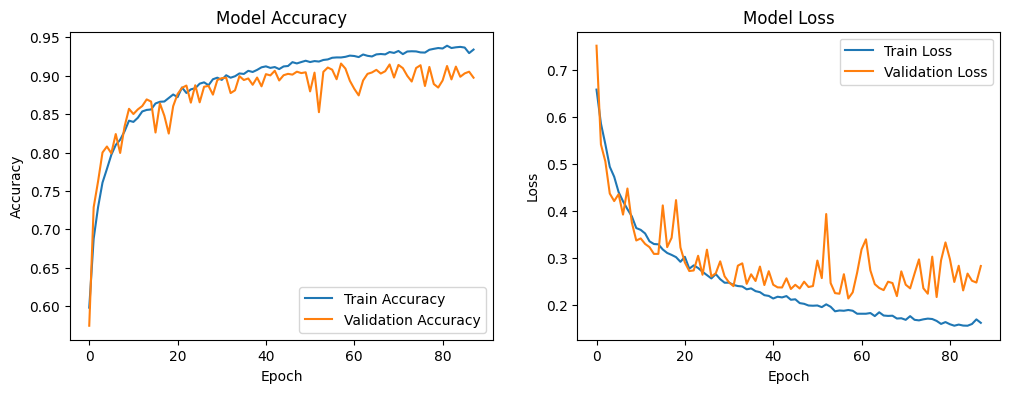

In [23]:
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [24]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_testCNN2, y_predCNN2, target_names=["Cat", "Dog"]))


Classification Report:
              precision    recall  f1-score   support

         Cat       0.96      0.83      0.89      2496
         Dog       0.85      0.97      0.90      2494

    accuracy                           0.90      4990
   macro avg       0.91      0.90      0.90      4990
weighted avg       0.91      0.90      0.90      4990



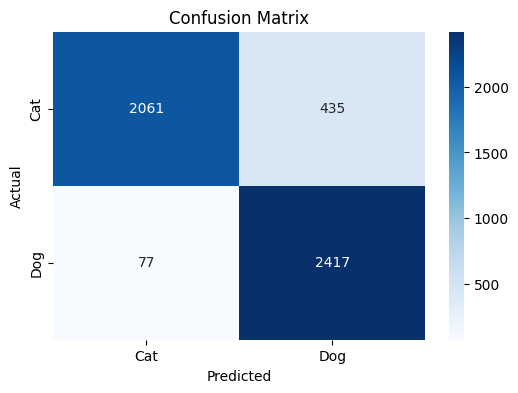

In [25]:
# Confusion matrix
cm = confusion_matrix(y_testCNN2, y_predCNN2)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Saving the model

In [26]:
# Save the model
model.save('best_cnn_model.h5')

# Note: After training the model with various parameters, including adjustments to the number of epochs, early stopping patience, and batch size, we achieved the best accuracy of 0.92. This model demonstrates balanced precision, recall, and F1-score for both Cat and Dog classes, making it the optimal choice based on the second confusion matrix and classification report.

___